In [1]:

### Create borders on the little cirkels , instead of all the same color, dark outlines to point
### Check how Benjamin did the fill/reason_fill or something
### Maybe look into color scheme
### Create contours on the plot, using sampling
### Copulas mathematical description of depende between random variables 
### Can use hydraulic or structural dataset to see if emperical stuff works

In [2]:
# Import local classes
import sys
sys.path.append(r'../../src/')
import bivariate.class_copula

# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyvinecopulib as cop
import scipy.stats as st



## Using Copula class for a Bivariate Distribution

In [3]:
# Create distributions for 2 random variables, X1 and X2
X1 = st.norm(0,1)           # Normal distribution with mean 0 and standard deviation 1
X2 = st.gumbel_r(0,1)       # Gumbel distribution with location 0 and scale 1


# Create a copula object
Copula_12 = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [0.7])


In [4]:
# Define a bivariate copula object
bivariate_copula_object = bivariate.class_copula.Bivariate([X1,X2], Copula_12)

In [5]:
# Generate random samples from the bivariate copula object
gen_random_samples = bivariate_copula_object.random_samples(100000)
print()

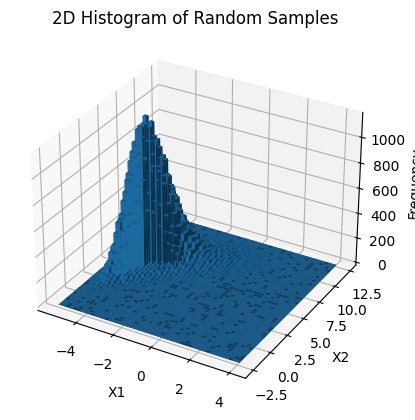

In [6]:
# Plot a 2D histogram of the random samples
bivariate_copula_object.plot_histogram_3D();

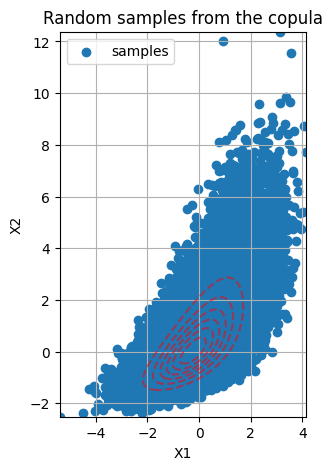

In [7]:
# Plot the random samples
bivariate_copula_object.plot_random_samples();

## 2. Region of interest defined by a function

#### Arbitrary function

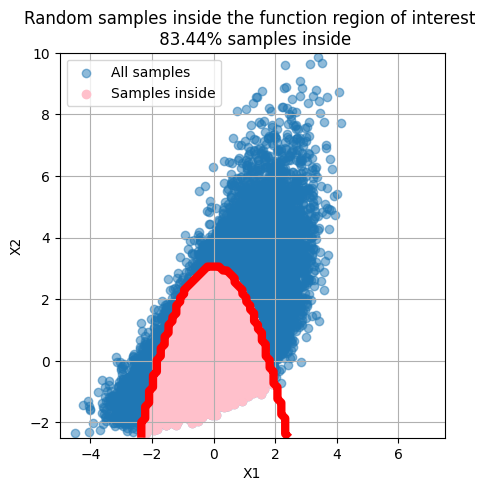

In [8]:
# Create a function
def func(X1,X2):
    function = (X1**2 + X2-3 <= 0)
    return function

# def func(X1,X2):
#     import numpy as np
#     function = (X1**2 + X2-3 <= 0 ) # This also works
#     return np.logical_not(function)

# Define a 2D region of interest object and insert the random samples and the function
region_2 = bivariate.class_copula.Region_of_interest(function=func ,random_samples=gen_random_samples)


# Run the function needed to check if the points are inside the region of interest
region_2.inside_function()

# Plot the points inside the region of interest
region_2.plot_inside_function(xy_lim=[-5, 7.5, -2.5, 10]);

#### Rectangular region

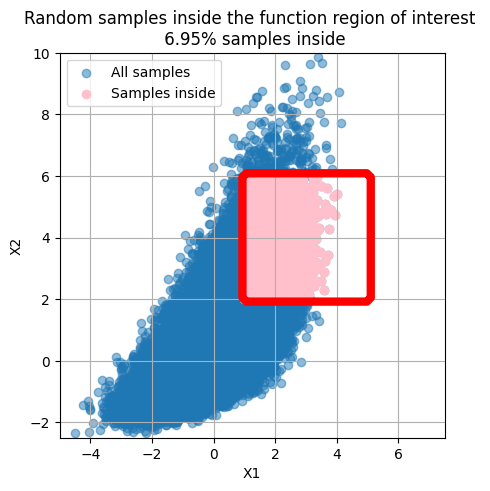

In [9]:
# Define a rectangular region of interest
def points_inside_rectangle(X1, X2):
    func = (1 <= X1) & (X1 <= 5) & (2 <= X2)  &  (X2 <= 6)
    return  func

# Define a 2D region of interest object and insert the random samples and the function
region_2 = bivariate.class_copula.Region_of_interest(function=points_inside_rectangle , random_samples=gen_random_samples)

# Run the function needed to check if the points are inside the region of interest
region_2.inside_function()

# Plot the points inside the region of interest
region_2.plot_inside_function(xy_lim=[-5, 7.5, -2.5, 10]);

#### Triangle

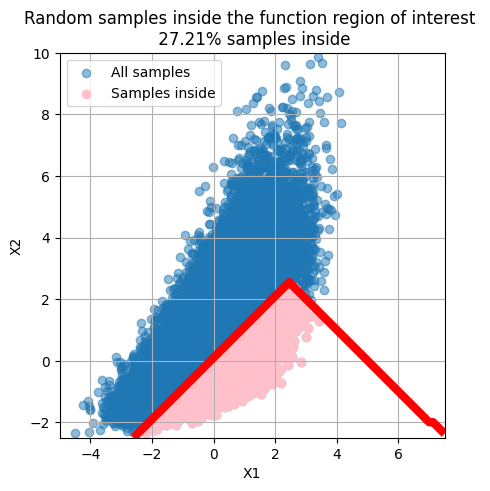

In [10]:
# Define a triangular region of interest
def points_inside_triangle(X1, X2):
    func = (X2 <= X1) & (X2 <= 5-X1)
    return  func

# Define a 2D region of interest object and insert the random samples and the function
region_2 = bivariate.class_copula.Region_of_interest(function=points_inside_triangle, random_samples=gen_random_samples)

# Run the function needed to check if the points are inside the region of interest
region_2.inside_function()

# Plot the points inside the region of interest
region_2.plot_inside_function(xy_lim=[-5, 7.5, -2.5, 10]);

# Multivariate distributions, also sampling with copulas

In [11]:
# Create distributions for 3 random variables, X1, X2, X3
X1 = st.norm(0,1)           # Normal distribution with mean 0 and standard deviation 1
X2 = st.gumbel_r(0,1)       # Gumbel distribution with location 0 and scale 1
X3 = st.uniform(0,1)        # Uniform distribution between 0 and 1

# Create the copula objects
Copula_12 = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [0.7])
Copulal_23 = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [0.5])

# Define conditional copula object
Cond_Copula_13_2 = cop.Bicop(family=cop.BicopFamily.gaussian, parameters = [0.8])

In [12]:
# Define the Multivariate object
multi_object = bivariate.class_copula.Multivariate(rv_array=[X1,X2,X3],
                                                   copulas_array=[Copula_12, Copulal_23],
                                                   conditional_copulas=[Cond_Copula_13_2])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


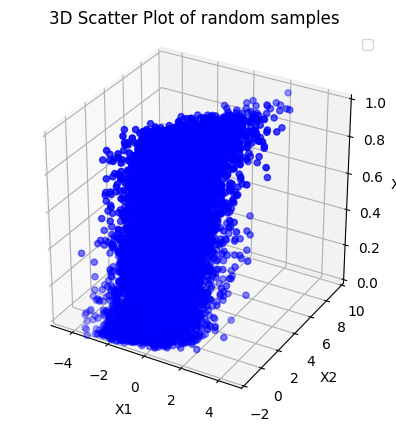

In [13]:
# Generate random samples from the multivariate object
gen_random_samples_multi = multi_object.random_samples_3D(10000)

# Plot the random samples
multi_object.plot_random_samples_3D(xyz_lim=[-5, 5, -2, 10, 0, 1]);

## Defining regions of interest for a 3D case

total_random_samples: 10000
amout_inside: 901
percentage_inside: 0.0901


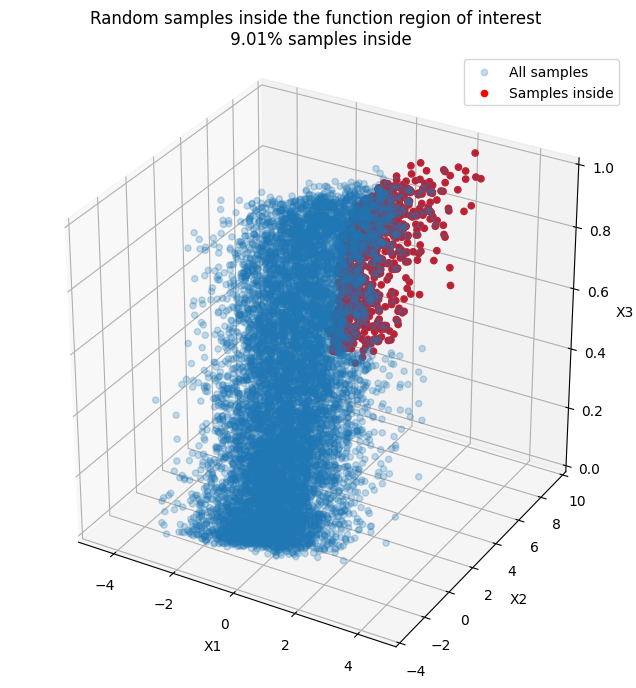

In [14]:
# Define a function
def boundary_function(X1, X2, X3):
    func = (1 <= X1) & (X1 <= 5) & (0.6 <= X3) 
    return func

# Define a 3D region of interest object and insert the random samples and the function
region_3D = bivariate.class_copula.Region_of_interest_3D(function=boundary_function, random_samples=gen_random_samples_multi)

# Check if the points are inside the region of interest
region_3D.inside_function_3d()

# Plot the all the points and the ones inside the region of interest
region_3D.plot_inside_function_3d(xyz_lim=[-5, 5, -4, 10, 0, 1]); 

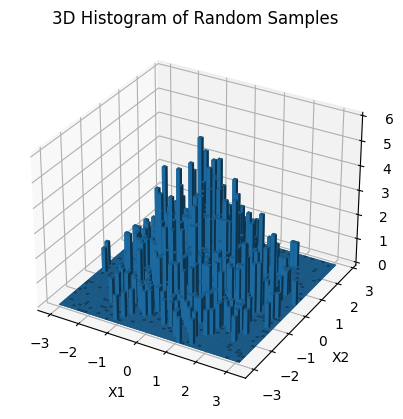

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate random samples
np.random.seed(0)
samples = np.random.normal(loc=0, scale=1, size=(1000, 2))

# Extract the X1 and X2 coordinates from the samples
x1 = samples[:, 0]
x2 = samples[:, 1]

# Define the number of bins for each dimension
num_bins_x1 = 50
num_bins_x2 = 50

# Create the 2D histogram
hist, x_edges, y_edges = np.histogram2d(x1, x2, bins=(num_bins_x1, num_bins_x2))

# Create meshgrid for 3D plotting
X, Y = np.meshgrid(x_edges[:-1], y_edges[:-1])

# Plot the 3D histogram
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.bar3d(X.flatten(), Y.flatten(), np.zeros_like(X.flatten()), 
         (x_edges[1]-x_edges[0]), (y_edges[1]-y_edges[0]), hist.flatten(), zsort='average')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Frequency')
ax.set_title('3D Histogram of Random Samples')

plt.show()
